## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
%matplotlib inline

### Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

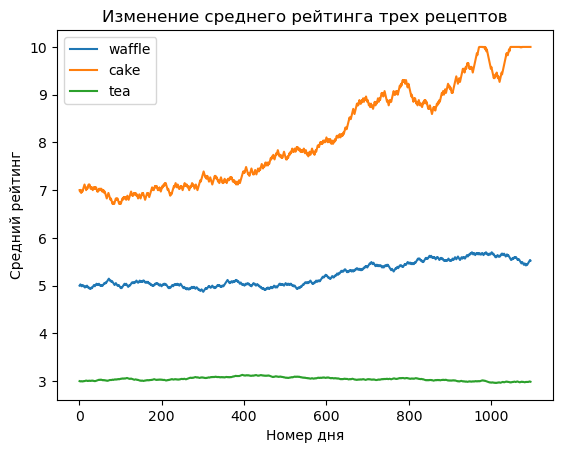

In [3]:
average_ratings = np.load('average_ratings.npy')
waffle_iron_french_toast = average_ratings[0]
zwetschgenkuchen_bavarian_plum_cake = average_ratings[1]
lime_tea = average_ratings[2]
days = [day for day in range(1, 1096)]

fig, ax = plt.subplots() # figsize=( , ) позволяет задать размер системы координат

waffle, = ax.plot(days, waffle_iron_french_toast, label='waffle')
cake, = ax.plot(days, zwetschgenkuchen_bavarian_plum_cake, label='cake')
tea, = ax.plot(days, lime_tea, label='tea')

ax.set_xlabel('Номер дня') 
ax.set_ylabel('Средний рейтинг') 
ax.set_title('Изменение среднего рейтинга трех рецептов') 
ax.legend(handles=[waffle, cake, tea]) # loc='upper left' место расположения легенды

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


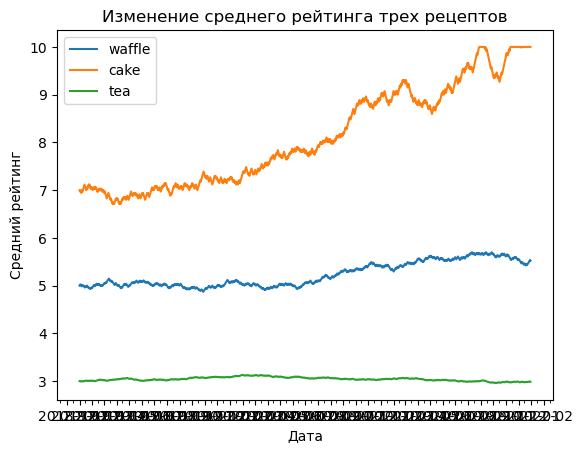

In [4]:
from matplotlib.dates import DateFormatter, MonthLocator

# Создание диапазона дат от 01.01.2019 по 30.12.2021
dates = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

fig, ax = plt.subplots()

waffle, = ax.plot(dates, waffle_iron_french_toast, label='waffle')
cake, = ax.plot(dates, zwetschgenkuchen_bavarian_plum_cake, label='cake')
tea, = ax.plot(dates, lime_tea, label='tea')

ax.set_xlabel('Дата')  # Изменение подписи горизонтальной оси на "Дата"
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

# Настройка major_locator и minor_locator для оси X
ax.xaxis.set_major_locator(MonthLocator())  # Основные деления по месяцам
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))  # Вспомогательные деления по середине месяца

# Добавление легенды 
ax.legend(handles=[waffle, cake, tea])

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

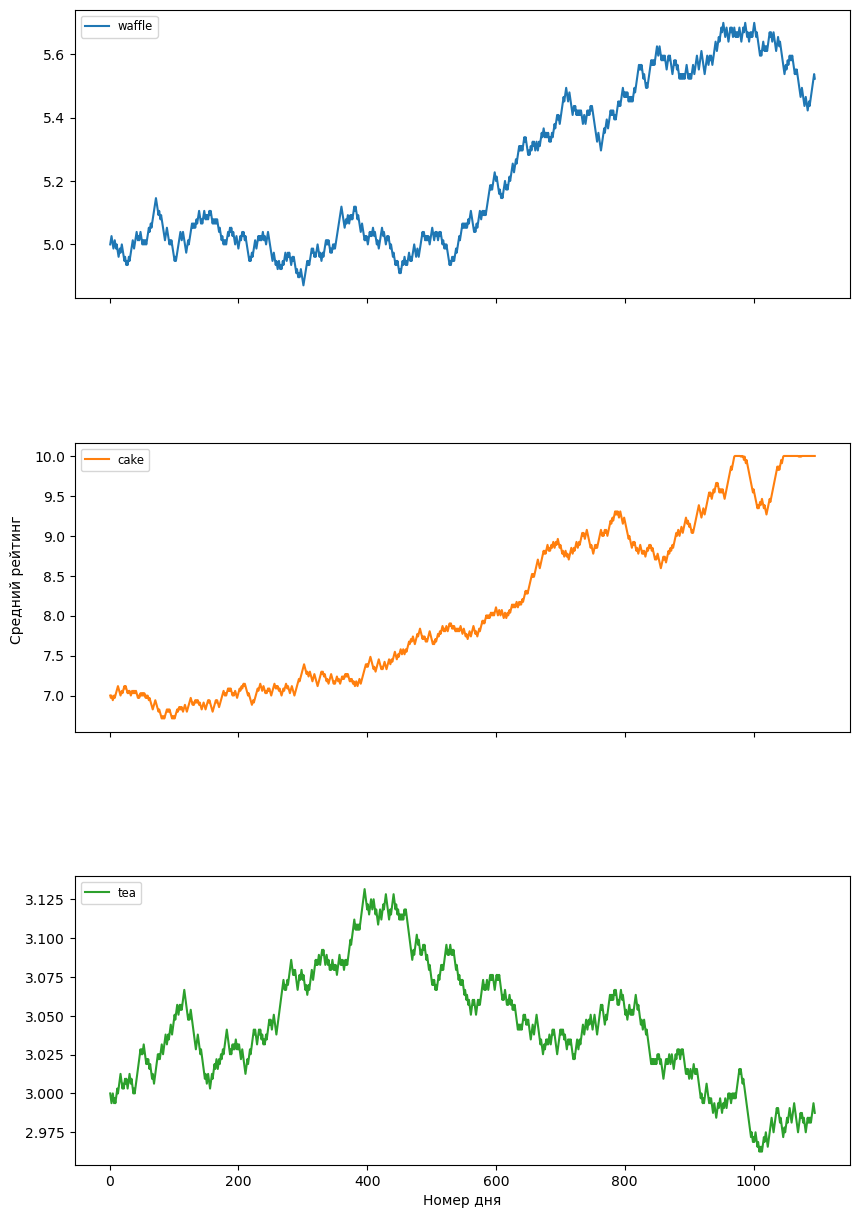

In [5]:
import matplotlib.colors as mcolors

fig, axs = plt.subplots(nrows=3, figsize=(10, 15))

# Получение списка цветов из mcolors.TABLEAU_COLORS
tableau_colors = list(mcolors.TABLEAU_COLORS.values())

# Построение графиков на каждом изображении с использованием цветов из списка
waffle, = axs[0].plot(days, waffle_iron_french_toast, color=tableau_colors[0], label='waffle')
cake, = axs[1].plot(days, zwetschgenkuchen_bavarian_plum_cake, color=tableau_colors[1], label='cake')
tea, = axs[2].plot(days, lime_tea, color=tableau_colors[2], label='tea')

# Настройка общего названия для вертикальных осей
fig.text(0.06, 0.5, 'Средний рейтинг', va='center', rotation='vertical')

axs[0].set_xticklabels([])  # Убираем значения на оси X для верхнего графика
axs[1].set_xticklabels([])  # Убираем значения на оси X для среднего графика
axs[2].set_xlabel('Номер дня')

axs[0].legend(handles=[waffle], labels=['waffle'], loc='upper left', fontsize='small')
axs[1].legend(handles=[cake], labels=['cake'], loc='upper left', fontsize='small')
axs[2].legend(handles=[tea], labels=['tea'], loc='upper left', fontsize='small')

plt.subplots_adjust(hspace=0.5)  # Увеличение расстояния между графиками

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 1.0, '$y(x)=\\lambda e^{-\\lambda x}$')

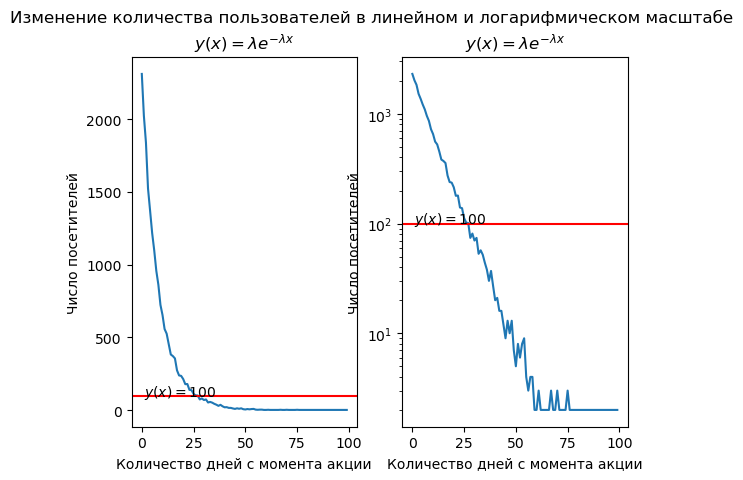

In [6]:
visitors = np.load('visitors.npy')
days = list(range(100))

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

lin, = ax1.plot(days, visitors)
log, = ax2.plot(days, visitors)

ax2.set_yscale("log")

ax1.set_xlabel('Количество дней с момента акции')
ax2.set_xlabel('Количество дней с момента акции')
ax1.set_ylabel('Число посетителей')
ax2.set_ylabel('Число посетителей')
ax1.axhline(y=100, color='r')
ax1.text(1, 100, '$y(x) = 100$')
ax2.axhline(y=100, color='r')
ax2.text(1, 100, '$y(x) = 100$')

ax1.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax2.set_title('$y(x)=\lambda e^{-\lambda x}$')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [7]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

In [8]:
reviews.head()

,Unnamed: 0,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [9]:
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

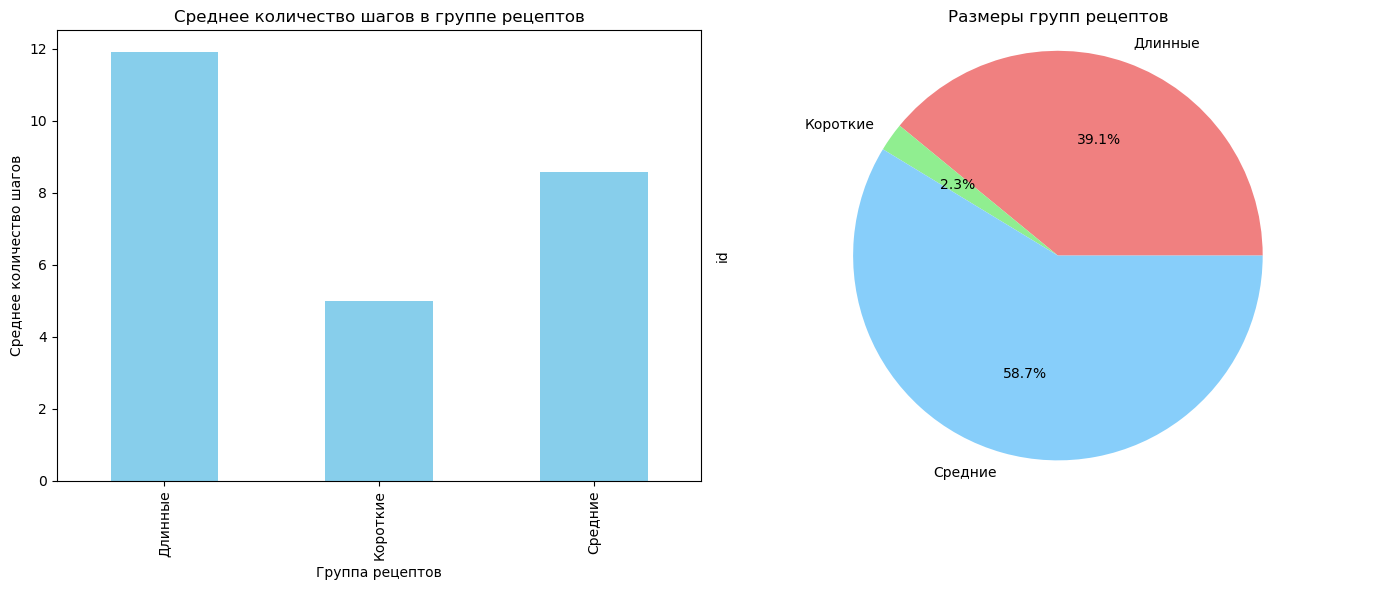

In [10]:
# Функция для определения длительности рецепта
def categorize_duration(minutes):
    if minutes < 5:
        return 'Короткие'
    elif minutes >= 5 and minutes < 50:
        return 'Средние'
    else:
        return 'Длинные'

# Добавление нового столбца с категорией длительности
recipes['duration_category'] = recipes['minutes'].apply(categorize_duration)

# Группировка данных по категории длительности и вычисление среднего количества шагов и размера группы
grouped_data = recipes.groupby('duration_category').agg({'n_steps': 'mean', 'id': 'count'})

# Создание отдельных областей для графиков
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Столбчатая диаграмма среднего количества шагов
grouped_data['n_steps'].plot(kind='bar', color='skyblue', ax=axs[0])
axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Среднее количество шагов')
axs[0].set_title('Среднее количество шагов в группе рецептов')

# Круговая диаграмма размеров групп рецептов
grouped_data['id'].plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'], ax=axs[1])
axs[1].axis('equal')
axs[1].set_title('Размеры групп рецептов')

plt.tight_layout()
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

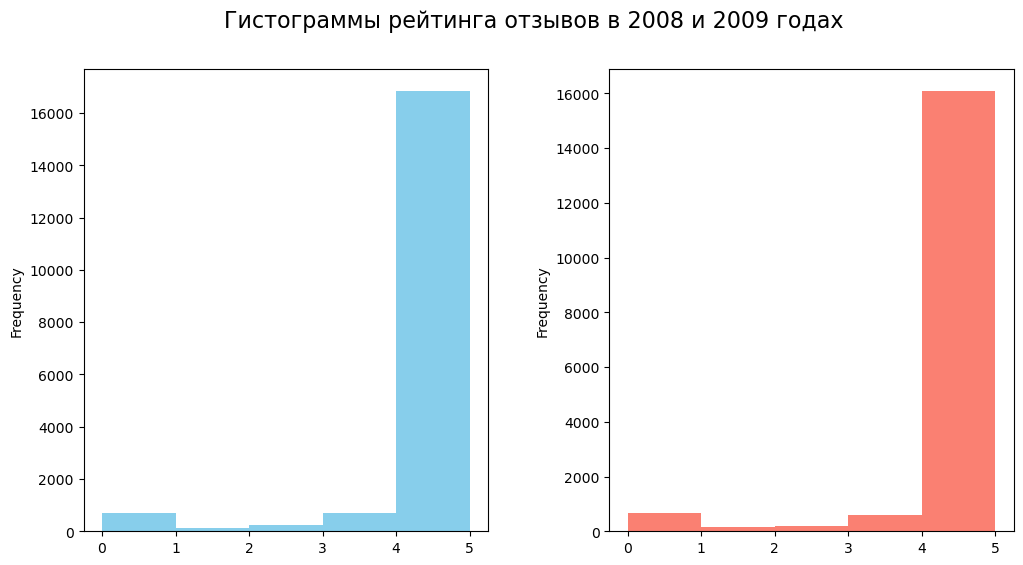

In [11]:
# Преобразование столбца 'date' в тип datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# Фильтрация отзывов только для 2008 и 2009 годов
filtered_reviews = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]

# Разделение данных на два датафрейма для каждого года
reviews_2008 = filtered_reviews[filtered_reviews['date'].dt.year == 2008]
reviews_2009 = filtered_reviews[filtered_reviews['date'].dt.year == 2009]

# Построение гистограмм
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

reviews_2008['rating'].plot.hist(ax=axs[0], bins=5, color='skyblue')
reviews_2009['rating'].plot.hist(ax=axs[1], bins=5, color='salmon')

# Добавление общей подписи для рисунка
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=16)

# Настройка расположения осей, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок
plt.subplots_adjust(wspace=0.3)

plt.show()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0, 0.5, 'Количество ингредиентов')

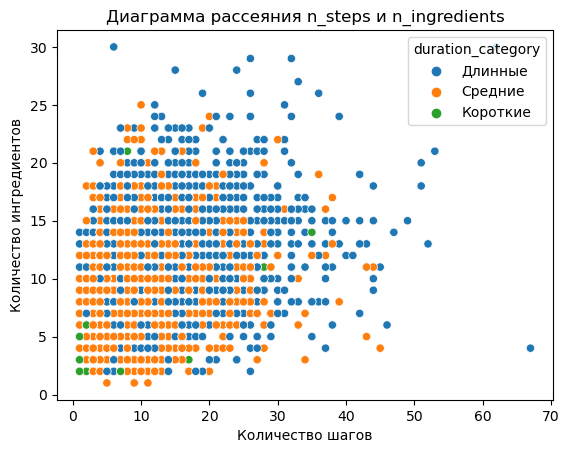

In [12]:
import seaborn as sns

# Создание диаграммы рассеяния с использованием Seaborn
plt.figure()
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration_category')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.xlabel('Количество шагов')
plt.ylabel('Количество ингредиентов')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

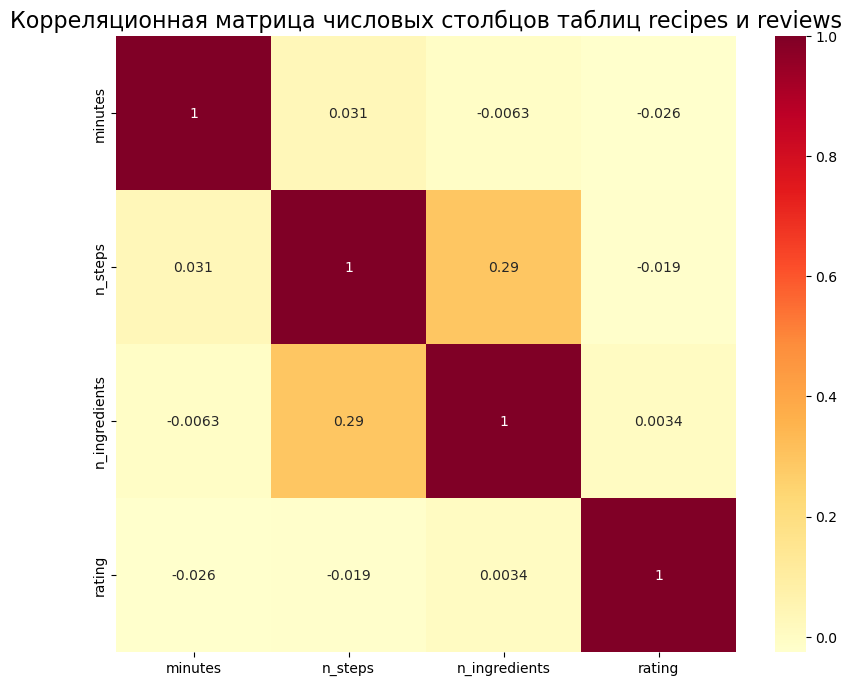

In [13]:
# Объединение таблиц по столбцу recipe_id
merged_df = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# Выбор необходимых столбцов для корреляционной матрицы
selected_columns = ['minutes', 'n_steps', 'n_ingredients', 'rating']
correlation_df = merged_df[selected_columns]

# Построение корреляционной матрицы
correlation_matrix = correlation_df.corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews', fontsize=16)
plt.show()